<center>
<img src="../../img/python_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 12. Элементарные задачи на графы. Способы задания графов.

## Число петель
По заданной матрице смежности неориентированного графа определите, содержит ли он петли.

**Входные данные**

На вход программы поступает число n ( 1 <= n <=  100) – количество вершин графа, а затем n строк по n чисел, каждое из которых равно 0 или 1, – его матрица смежности.

**Выходные данные**

Выведите  «YES», если граф содержит петли, и «NO» в противном случае.

**Пример входных данных**

5

1 1 1 1 0 

1 0 1 1 1

1 1 0 1 1

1 1 1 1 1 

0 1 1 1 0

**Изобразим этот граф**

Populating the interactive namespace from numpy and matplotlib


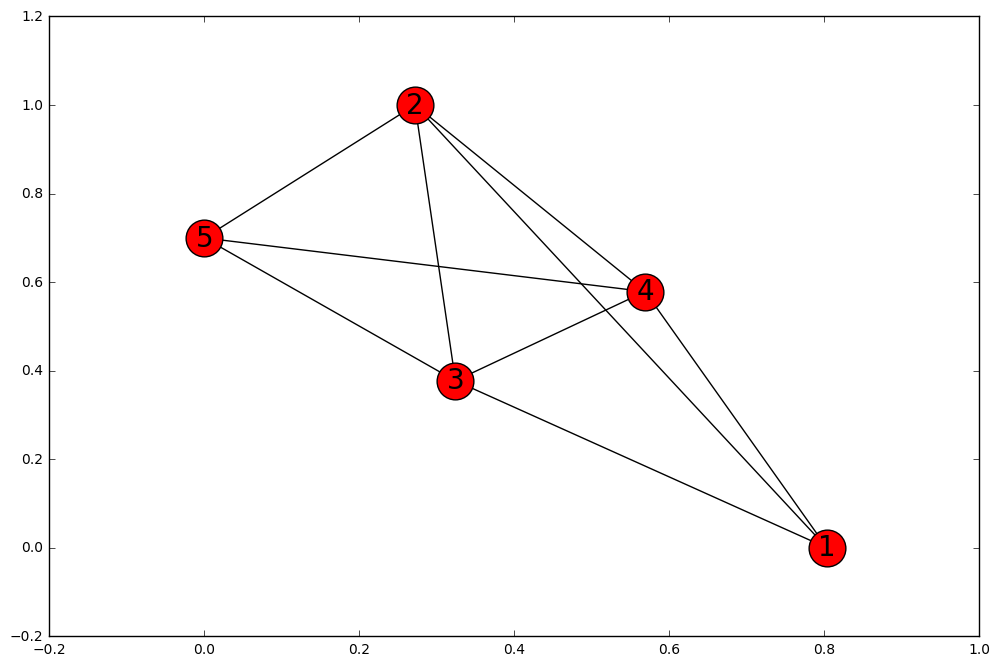

In [1]:
%pylab inline
figsize(12, 8)

import networkx as nx

G=nx.Graph()
G.add_nodes_from(range(1,6))
edge_list = [(1,1), (1,2), (1,3), (1,4),
            (2,3), (2,4), (2,5),
            (3,4), (3,5), (4,4), (4,5)]
G.add_edges_from(edge_list)

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20,
                        font_family='sans-serif')

# edges
nx.draw_networkx_edges(G, pos, edgelist=edge_list, font_size=16)



show() # matplotlib.pyplot.show()

In [3]:
with open('../../data/sample_adj_matrix.txt') as adj_matrix_file:
    n = int(adj_matrix_file.readline().strip())
    num_self_loops = 0
    for (line_id, line) in enumerate(adj_matrix_file):
        row = [int(a) for a in line.strip().split()]
        if row[line_id] == 1:
            num_self_loops += 1
    print(num_self_loops)

2


## Полный граф

Неориентированный граф с кратными рёбрами называется полным, если любая пара его различных вершин соединена хотя бы одним ребром. Для заданного списком ребер графа проверьте, является ли он полным.

**Входные данные**

Сначала вводятся числа n ( 1 <= n <= 100) – количество вершин в графе и m ( 1$ le$m$ le$10000) – количество ребер. Затем следует m пар чисел – ребра графа.

**Выходные данные**

Выведите  «YES», если граф является полным, и «NO» в противном случае.

**Пример**

**Вход**

5 18

1 2

1 3

1 3

1 4

1 4

1 4

1 5

1 5

2 3

2 4

2 4

2 5

3 4

3 4

3 4

3 5

3 5

4 5

**Выход**

"YES"

In [5]:
def is_complete(adj_list_file_path):
    
    with open(adj_list_file_path) as adj_list_file:
        num_vert, num_edges = [int(i) for i in 
                               adj_list_file.readline().strip().split()]
        edge_freq = {}
        for line in adj_list_file:
            edge = tuple([int(i) for i in line.strip().split()])
            if edge not in edge_freq:
                edge_freq[edge] = 1
            else:
                edge_freq[edge] += 1


        for i in range(1, num_vert + 1):
            for j in range(i+1, num_vert + 1):
                if (i, j) not in edge_freq:
                    return False
        return True

                
print(is_complete('../../data/sample_adj_list.txt'))     

True
